In [4]:
#a)Create collections “flights” inside database “airline_delayDB”

from pymongo import MongoClient
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def mongoimport(csv_path):
        flight_df = pd.read_csv(csv_path)
        payload = json.loads(flight_df.to_json(orient = 'records'))
        collection.delete_many({})
        collection.insert_many(payload)
       

In [6]:
if __name__ =="__main__":
    client = MongoClient("mongodb://localhost:27017")
    db = client['airline_delayDB']
    collection = db['flights']
   

In [9]:
mongoimport('C:/Users/amelgirx/Flights_Delay.csv')

In [10]:
#b) Average arrival dealy caused by airlines

a=collection.aggregate([{'$group':{'_id':'null','averagedealy':{'$avg':'$ARRIVAL_DELAY'}}},{'$project':{'_id':0}}])
for item in a:
    print(item)

{'averagedealy': 7.545457931394093}


,_id,averagedealy
0,3,11.343455
1,2,8.122952
2,1,5.860943


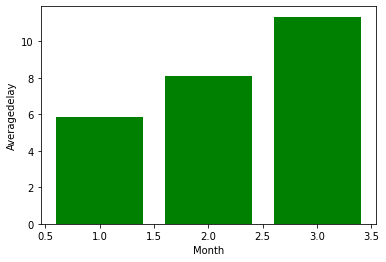

In [11]:
#c)Days of months with respect to average of arrival delay
a=collection.aggregate([{'$group':{'_id':'$MONTH','averagedealy':{'$avg':'$ARRIVAL_DELAY'}}}])

df=pd.DataFrame(a)
display(df)
plt.bar(df['_id'], df['averagedealy'],color="green")
plt.xlabel('Month')
plt.ylabel('Averagedelay')
plt.show()

,_id,averagedealy
0,4,7.174969
1,7,10.110840
2,5,6.010538
3,2,8.033644
4,6,4.888689
5,3,5.587079
6,1,10.807447


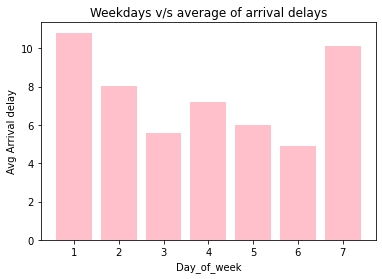

In [12]:
#d)  Arrange weekdays with respect to average of arrival delay  
a=collection.aggregate([{'$group':{'_id':'$DAY_OF_WEEK','averagedealy':{'$avg':'$ARRIVAL_DELAY'}}}])
df=pd.DataFrame(a)
display(df)
plt.bar(df['_id'],df['averagedealy'],color='pink')
plt.title('Weekdays v/s average of arrival delays')
plt.xlabel('Day_of_week')
plt.ylabel('Avg Arrival delay')
plt.show()

In [14]:
#e)Arrange Days of month as per cancellation done in descending order
allDocuments = collection.aggregate([{'$match':{'DAY':1}},{'$group':{'_id':'$CANCELLED','totalcount':{'$count':{}}}},{'$sort':{'totalcount':-1}}])
for item in allDocuments:
    print(item)
                    

{'_id': 0, 'totalcount': 2011}
{'_id': 1, 'totalcount': 237}


In [15]:
#f)Find the busiest airports with respect to day of week
allDocuments = collection.aggregate([{'$match':{'DAY_OF_WEEK':2}},{'$group':{'_id':'null','busiestairport':{'$max':'$ORIGIN_AIRPORT'}}},{'$project':{'_id':0}}])
for item in allDocuments:
   print(item)

{'busiestairport': 'YUM'}


In [16]:
#g)Find top 10 airlines of us
allDocuments = collection.aggregate([{'$match':{'AIRLINE':"US"}},{'$sort':{'AIRLINE':-1}},{'$limit':10}])
for item in allDocuments:
    print(item)

{'_id': ObjectId('6364d4e9cacaf9d79e4c12aa'), 'ID': 104, 'YEAR': 2015, 'MONTH': 2, 'DAY': 24, 'DAY_OF_WEEK': 2, 'AIRLINE': 'US', 'FLIGHT_NUMBER': 879, 'TAIL_NUMBER': 'N176UW', 'ORIGIN_AIRPORT': 'PVD', 'DESTINATION_AIRPORT': 'CLT', 'SCHEDULED_DEPARTURE': 800, 'DEPARTURE_TIME': 751.0, 'DEPARTURE_DELAY': -9.0, 'TAXI_OUT': 39.0, 'WHEELS_OFF': 830.0, 'SCHEDULED_TIME': 148, 'ELAPSED_TIME': 174.0, 'AIR_TIME': 115.0, 'DISTANCE': 683, 'WHEELS_ON': 1025.0, 'TAXI_IN': 20.0, 'SCHEDULED_ARRIVAL': 1028, 'ARRIVAL_TIME': 1045.0, 'ARRIVAL_DELAY': 17.0, 'DIVERTED': 0, 'CANCELLED': 0, 'CANCELLATION_REASON': None, 'AIR_SYSTEM_DELAY': 17.0, 'SECURITY_DELAY': 0.0, 'AIRLINE_DELAY': 0.0, 'LATE_AIRCRAFT_DELAY': 0.0, 'WEATHER_DELAY': 0.0}
{'_id': ObjectId('6364d4e9cacaf9d79e4c12ab'), 'ID': 105, 'YEAR': 2015, 'MONTH': 3, 'DAY': 4, 'DAY_OF_WEEK': 3, 'AIRLINE': 'US', 'FLIGHT_NUMBER': 1777, 'TAIL_NUMBER': 'N712US', 'ORIGIN_AIRPORT': 'DCA', 'DESTINATION_AIRPORT': 'RSW', 'SCHEDULED_DEPARTURE': 1530, 'DEPARTURE_TIME':

In [17]:
#h)Finding airlines that make the maximum, minimum number of cancellations.
allDocuments = collection.aggregate([{'$group':{'_id':'null','maxcancel':{'$max':'$CANCELLED'},'mincancel':{'$min':'$CANCELLED'}}},{'$project':{'_id':0}}])
for item in allDocuments:
    print(item)


{'maxcancel': 1, 'mincancel': 0}


In [18]:
#i)Find and show airlines names in descending that make the most number of diversions made        
s = collection.aggregate([{'$match':{'DIVERTED':1}},{'$group':{'_id':'$AIRLINE','totalcount':{'$count':{}}}},{'$sort':{'totalcount':-1}}])
for item in s:
    print(item)
   

{'_id': 'WN', 'totalcount': 35}
{'_id': 'OO', 'totalcount': 25}
{'_id': 'EV', 'totalcount': 22}
{'_id': 'DL', 'totalcount': 18}
{'_id': 'B6', 'totalcount': 16}
{'_id': 'AA', 'totalcount': 12}
{'_id': 'US', 'totalcount': 9}
{'_id': 'UA', 'totalcount': 8}
{'_id': 'MQ', 'totalcount': 5}
{'_id': 'HA', 'totalcount': 1}


In [19]:
#j)Finding days of month that see the most number of diversion
d = collection.aggregate([{'$match':{'DIVERTED':1}},{'$group':{'_id':'$AIRLINE','totalcount':{'$count':{}}}},{'$sort':{'totalcount':-1}}])
for item in d:
    print(item)

{'_id': 'WN', 'totalcount': 35}
{'_id': 'OO', 'totalcount': 25}
{'_id': 'EV', 'totalcount': 22}
{'_id': 'DL', 'totalcount': 18}
{'_id': 'B6', 'totalcount': 16}
{'_id': 'AA', 'totalcount': 12}
{'_id': 'US', 'totalcount': 9}
{'_id': 'UA', 'totalcount': 8}
{'_id': 'MQ', 'totalcount': 5}
{'_id': 'HA', 'totalcount': 1}


In [22]:
#h) Finding airlines that make the maximum, minimum number of cancellations.
    
min_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},
                                   {'$group':{'_id':'$AIRLINE',
                                    'min_cancellation':{'$count':{}}}},
                                   {'$sort':{'min_cancellation': 1}}, {'$limit':1}
                                         ])
for i in min_cancellation:
        print(i)
    
max_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},
                                   {'$group':{'_id':'$AIRLINE',
                                  'max_cancellation':{'$count':{}}}},
                                  {'$sort':{'max_cancellation': -1}}, {'$limit':1}
                                        ])
for i in max_cancellation:
        print(i)
    
    
    
print("*"*40)

{'_id': 'HA', 'min_cancellation': 3}
{'_id': 'MQ', 'max_cancellation': 414}
****************************************


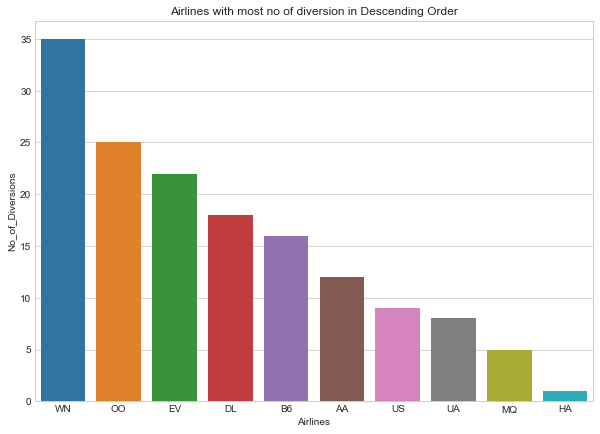

In [23]:
# i) Find and show airlines names in descending that make the most number of diversions made.
    #    [Create a suitable plot using matplotlib/seaborn]
    
airline_diversions = collection.aggregate([{'$match' : {'DIVERTED':1}},
                                    {'$group':{'_id':'$AIRLINE',
                                 'No_of_Diversions':{'$count':{}}}},
                                {'$sort':{'No_of_Diversions': -1}}])
    
    
airline_diversion_df=pd.DataFrame(airline_diversions)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=airline_diversion_df['_id'],y=airline_diversion_df['No_of_Diversions'])
plt.title('Airlines with most no of diversion in Descending Order')
plt.xlabel('Airlines')
plt.show()

In [24]:
#j) Finding days of month that see the most number of diversion
no_of_diversions = collection.aggregate([{'$match' : {'DIVERTED':1}},
                                     {'$group':{'_id':'$DAY',
                                     'No_of_Diversions':{'$count':{}}}},
                                     {'$sort':{'No_of_Diversions': -1}},{'$limit':1}
                                           ])
    
for i in no_of_diversions:
         print(i)
    
    
    
print("*"*40)

{'_id': 2, 'No_of_Diversions': 15}
****************************************


In [25]:
#k) Calculating mean and standard deviation of departure delay for all flights in minutes
departure_delay = collection.find({},{'DEPARTURE_DELAY':1,'_id':0})
    
departure_delay_df=pd.DataFrame(departure_delay)
print("Mean:",departure_delay_df.mean())
print("Standard Deviation:",departure_delay_df.std())
    
    
print("*"*40)

Mean: DEPARTURE_DELAY    11.329091
dtype: float64
Standard Deviation: DEPARTURE_DELAY    39.620916
dtype: float64
****************************************


In [26]:
#l) Calculating mean and standard deviation of arrival delay for all flights in minutes
arrival_delay = collection.find({},{'ARRIVAL_DELAY':1,'_id':0})
    
arrival_delay_df=pd.DataFrame(arrival_delay)
print("Mean:",arrival_delay_df.mean())
print("Standard Deviation:",arrival_delay_df.std())
    
    
print("*"*40)

Mean: ARRIVAL_DELAY    7.545458
dtype: float64
Standard Deviation: ARRIVAL_DELAY    42.378386
dtype: float64
****************************************


In [27]:
#n) Finding all diverted Route from a source to destination Airport & which route is the most diverted route.
no_of_diversions=collection.aggregate([{'$match':{'DIVERTED':1}},
                                    {'$group' :{'_id' : {'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT',"DESTINATION_AIRPORT":'$DESTINATION_AIRPORT'},
                                               'Most_Deversions_Count':{'$sum':1}}},
                                    {'$sort':{'Most_Deversions_Count':-1}}                    ])
        
    #ii)
no_of_diversions_df=pd.DataFrame(no_of_diversions)
diversions_max=no_of_diversions_df.get('Most_Deversions_Count').max()
    
print(no_of_diversions_df[no_of_diversions_df['Most_Deversions_Count']==diversions_max]['_id'])
   
    
print("*"*40)

0    {'ORIGIN_AIRPORT': 'STT', 'DESTINATION_AIRPORT...
1    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
2    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
3    {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT...
4    {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT...
5    {'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT...
6    {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
7    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
8    {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
Name: _id, dtype: object
****************************************


In [28]:
#o) When is the best time of day/day of week/time of year to fly with minimum delay
total_delay=collection.aggregate([{'$group':{'_id':'$_id','total':{'$sum':'$ARRIVAL_DELAY'}}},{'$sort': {'total':1}},
                                  {'$limit':1}])
for i in total_delay:
 print(i)

{'_id': ObjectId('6364d4e9cacaf9d79e4cc4a6'), 'total': -76.0}
